# Part I - Exploration of Ford GoBike System Data 
## by Olaoluwa Idowu

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area
 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [51]:
# loading the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
print(df.shape,"\n")
print(df.dtypes)

(183412, 16) 

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
# Checking for null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
df_clean = df.copy()

In [8]:
# coverting start_time and end_time column to datetime type

df_clean['start_time'] = df.start_time.astype('datetime64')
df_clean['end_time'] = df.end_time.astype('datetime64')

# converting start_station_id, end_station_id, bike_id to object type

df_clean.start_station_id = df.start_station_id.astype('object')
df_clean.end_station_id = df.end_station_id.astype('object')
df_clean.bike_id = df.bike_id.astype('object')

# Test
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [9]:
# dropping rows with null values

df_clean.dropna(axis=0, inplace = True)


# Test

df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
# creating the start day column

df_clean['start_day'] = df_clean['start_time'].dt.day_name()

# creating the start month column

df_clean['start_month'] = df_clean['start_time'].dt.month_name()

In [11]:
df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,Friday,February
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,Friday,February
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,Friday,February
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,Friday,February


In [12]:
# creating age column.

df_clean['Age'] = df_clean.start_time.dt.year - df_clean.member_birth_year
df_clean['Age'] = df_clean['Age'].astype(int)


# test
df_clean.Age

0         35
2         47
3         30
4         45
5         60
          ..
183407    23
183408    35
183409    29
183410    31
183411    30
Name: Age, Length: 174952, dtype: int64

In [13]:
# Renaming bike_share_for_all_trip column to bike_share for easy use in analysis

df_clean.rename(columns = {'bike_share_for_all_trip':'bike_share'}, inplace = True)

# test 
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share', 'start_day',
       'start_month', 'Age'],
      dtype='object')

In [14]:
from math import sqrt, radians, atan2, sin, cos, cos

def calculate_bin(column):
    num = int(sqrt(len(column)))
    bin_width = (column.max() - column.min()) / num
    bins = np.arange(0,column.max(), bin_width)
    print(bin_width)
    
    return bins



def get_bin(column, binsize):
    bins = np.arange(0, column.max()+binsize, binsize)
    return bins


def distance(lat1,lon1,lat2,lon2):
    
    r = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = r * c
    return round(distance, 2)

In [15]:
 # creating the distance(km) column
    
df_clean['distance(km)'] = df_clean.apply(lambda x: distance(
    x['start_station_latitude'], x['start_station_longitude']
    , x['end_station_latitude'], x['end_station_longitude']), axis=1)

# creating the speed column

df_clean['average_speed(km/h)'] = df_clean['distance(km)'] / (df_clean.duration_sec / 3600)


# test

df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share,start_day,start_month,Age,distance(km),average_speed(km/h)
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,February,35,0.54,0.037252
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,February,47,2.71,0.157726
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,February,30,0.26,0.025651
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,February,45,2.41,5.473817
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,Thursday,February,60,3.33,6.686001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,4832,Subscriber,1996.0,Male,No,Friday,February,23,1.47,11.025000
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,4960,Subscriber,1984.0,Male,No,Friday,February,35,1.40,16.102236
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,3824,Subscriber,1990.0,Male,Yes,Friday,February,29,0.38,9.702128
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,5095,Subscriber,1988.0,Male,No,Friday,February,31,0.75,19.424460


In [16]:
df_clean.shape

(174952, 21)

In [17]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,Age,distance(km),average_speed(km/h)
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,34.196865,1.690516,10.842818
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,10.118731,1.097318,3.914975
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,18.000000,0.000000,0.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,27.000000,0.910000,8.730539
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,32.000000,1.430000,11.076923
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,39.000000,2.220000,13.371429
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,141.000000,69.490000,36.020734


In [52]:
# storing the dataframe to csv 
df_clean.to_csv('fordgobike_clean.csv', index=False)

### What is the structure of your dataset?

> There are currently 174952 observations and 21 variables in my dataset.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset are User type, distance covered, gender, age, bike sharing, duration, day of the week.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think start_time, longtitude and latitude, duration_sec, birth year are features that will support my investigation into my features of interest.

## Univariate Exploration


In [18]:
# Creating a function to add labels.
def put_labels(chart_title,x,y):
    if x == 0 and y == 0:
        plt.title(chart_title, fontsize=15, fontweight='bold')
    else:
        plt.title(chart_title, fontsize=15, fontweight='bold',pad=16)
        plt.xlabel(x, labelpad=16)
        plt.ylabel(y, labelpad=16)

Let's examine the distribution of duration. Is the distribution of duration normal or skewed?

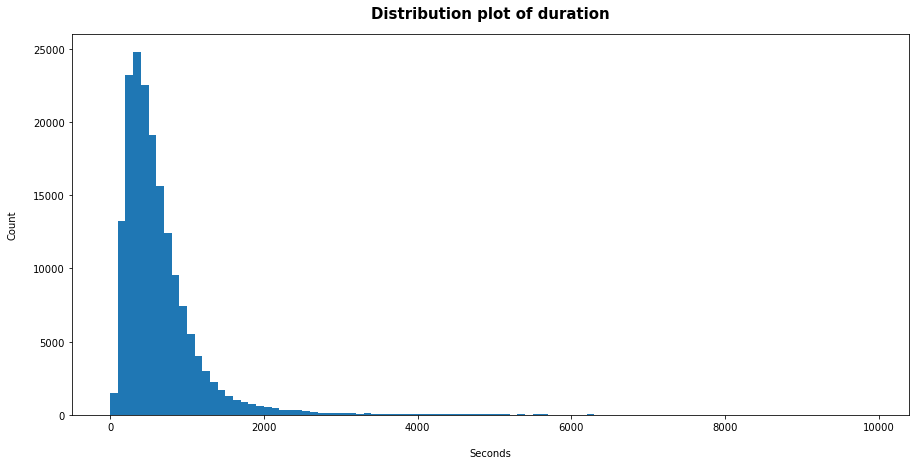

In [19]:
plt.figure(figsize=(15,7))
bins = np.arange(0, 10000, 100)

plt.hist(df_clean.duration_sec, bins=bins)
put_labels('Distribution plot of duration', 'Seconds', 'Count')

The distribution of duration appears to positeively skewed. Most rides spent duration less than 2000 seconds.

Let's examine the distribution of ages. Is the ditribution ages normal or skewed?

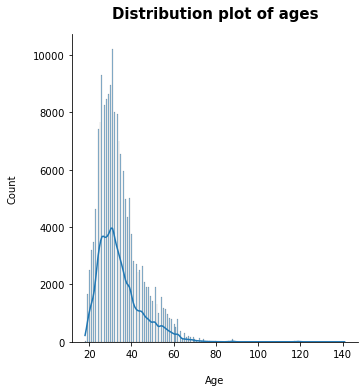

In [20]:
# using seaborn to check distribution of ages
sb.displot(df_clean.Age, kde=True);

put_labels('Distribution plot of ages', 'Age', 'Count')

The distribution of ages is positively skewed, there are more riders between the ages of 20 and 60. There is a higher count of riders between the ages of 20 to 40. Although riders between the ages of 100 and 140 seems to be outliers and unrealistic, I will leave the obseravation as there are other useful information to be extracted from other variables.

Which gender took the highest number of trips?

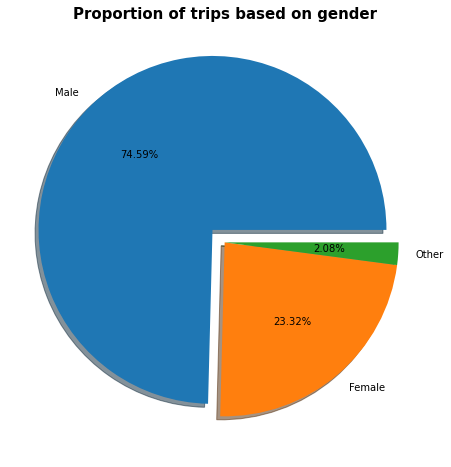

In [21]:
# Checking gender with highest count of trips 
plt.figure(figsize = [12, 8])
plt.pie(df_clean['member_gender'].value_counts()
        , labels = df_clean['member_gender'].value_counts().index,
        explode = [0.1,0,0], autopct='%1.2f%%', shadow=True)
put_labels('Proportion of trips based on gender', 0, 0)

From the pie chart, it is obvious the Male gender has the highest number of trips. This could be as a result of bike sharing amongst the male gender. I will further examine this later in my analysis. 

which category of user has the highest count of trips?

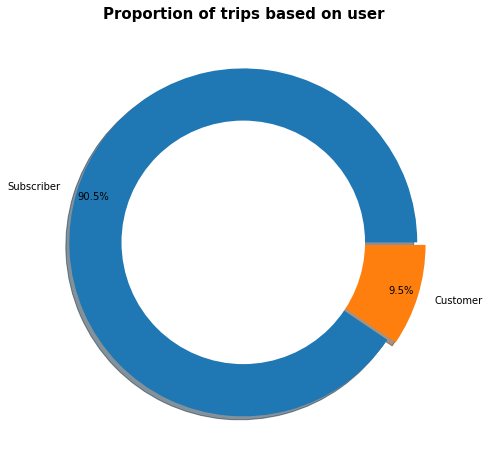

In [22]:
plt.figure(figsize = [12, 8])
plt.pie(df_clean['user_type'].value_counts()
        , labels = df_clean['user_type'].value_counts().index, autopct='%1.1f%%'
        , explode = [0,0.05], pctdistance=0.90, shadow=True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
put_labels('Proportion of trips based on user', 0, 0)

The subscriber users have higher number of trips than the customer user type.

Let's observe the start day of the week with highest count of trips. Which day has the highest count of trips?

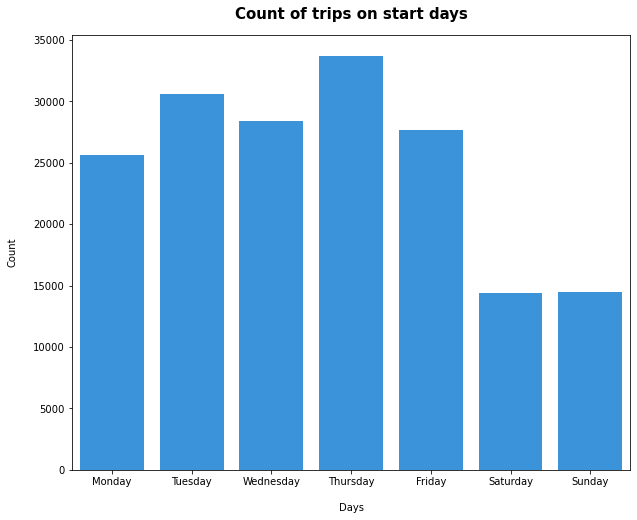

In [23]:
# This gives the total number of trips that occurred on various start days of the week. 
plt.figure(figsize = [10, 8])
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=df_clean, x='start_day', color='#2196f3', order=order)
put_labels('Count of trips on start days', 'Days', 'Count')

From the count plot there are more trips on thursdays than any other day of the week.

I will like to examine bike sharing. Do most users share bikes?

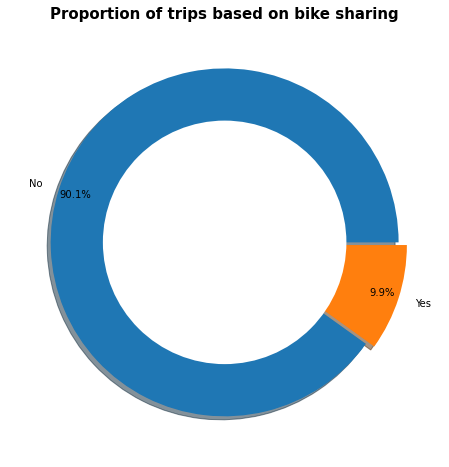

In [24]:
plt.figure(figsize = [12, 8])
plt.pie(df_clean['bike_share'].value_counts()
        , labels = df_clean['bike_share'].value_counts().index, autopct='%1.1f%%'
        , explode = [0,0.05], pctdistance=0.90, shadow=True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
put_labels('Proportion of trips based on bike sharing', 0, 0)

Fewer users share bikes as showing in the donut chart.

Bikes with the highest number of trips. Users could be interested in a bike for a particular reason. If the a bike is frequently used, such bike needs higher level of maintenance. What is the ID of the most used bike?

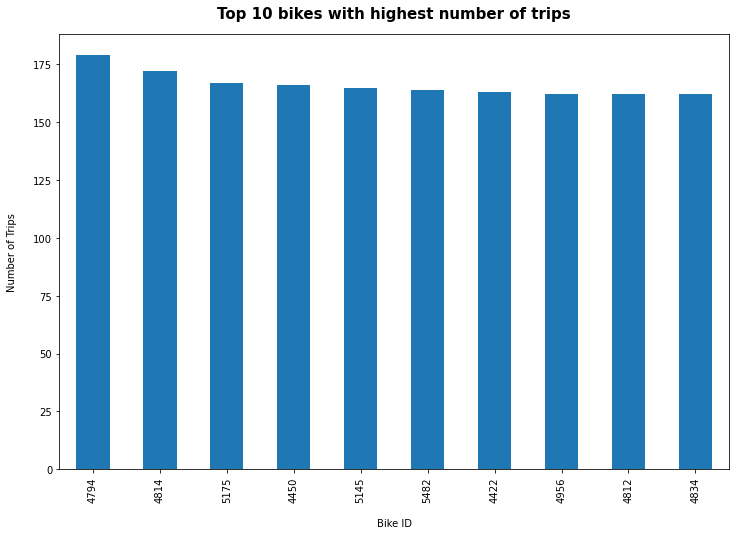

In [25]:
plt.figure(figsize = [12, 8])
df_clean.bike_id.value_counts().nlargest(10).plot(kind='bar')
put_labels('Top 10 bikes with highest number of trips', 'Bike ID', 'Number of Trips')

The bike with id 4794 is the bike with highest number of trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of duration and ages are both positively skewed. Majority of the riders are young.

> To get the age feature, the birth year was tranformed by subtracting from the start year.

> Distance column was derived from the the start and end latitudes and longtitude


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The age variable had values that were unreasonable, like ages above 100 riding bikes were unreasonable. There was no operation performed to remove outliers as this values did not affect the analysis and other useful information could still be extracted from the observations

## Bivariate Exploration



Is there a correlation between variable Age and duration or average speed or distance covered?

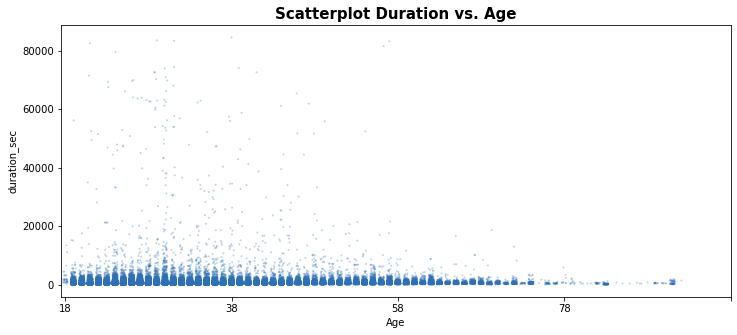

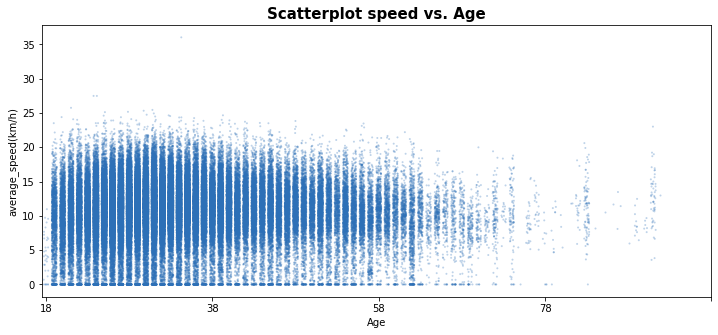

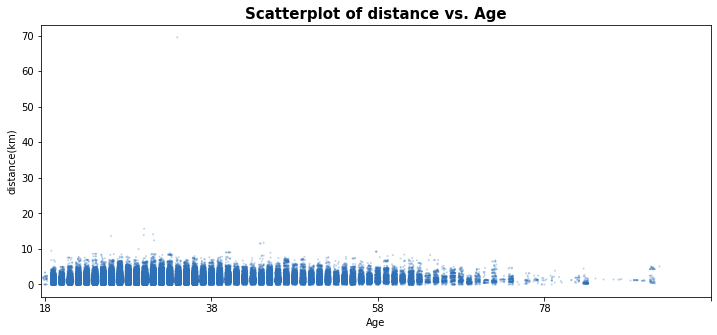

In [66]:
# creating a stripplot of duration vs age

plt.figure(figsize = [12, 5])
ax1 = sb.stripplot(data=df_clean,x='Age',y='duration_sec',alpha = 0.3, jitter = 0.3, s=2, palette=["#2d70b7"])
put_labels('Scatterplot Duration vs. Age', 0, 0)
ax1.set(xticks = [0,20,40,60,80]);

# creating a scatter plot of average speed vs age

plt.figure(figsize = [12, 5])
ax2 = sb.stripplot(data=df_clean,x='Age',y='average_speed(km/h)',alpha = 0.3, jitter = 0.3, s=2, palette=["#2d70b7"])
put_labels('Scatterplot speed vs. Age', 0, 0)
ax2.set(xticks = [0,20,40,60,80]);

plt.figure(figsize = [12, 5])
ax3 = sb.stripplot(data=df_clean,x='Age',y='distance(km)',alpha = 0.3, jitter = 0.3, s=2, palette=["#2d70b7"])
put_labels('Scatterplot of distance vs. Age', 0, 0)
ax3.set(xticks = [0,20,40,60,80]);

From the scatter plots above, there is no correlation between age and any of the three variables(duration, speed or distance)

Let's examine our user groups. Which user group has the highest average time on trips?

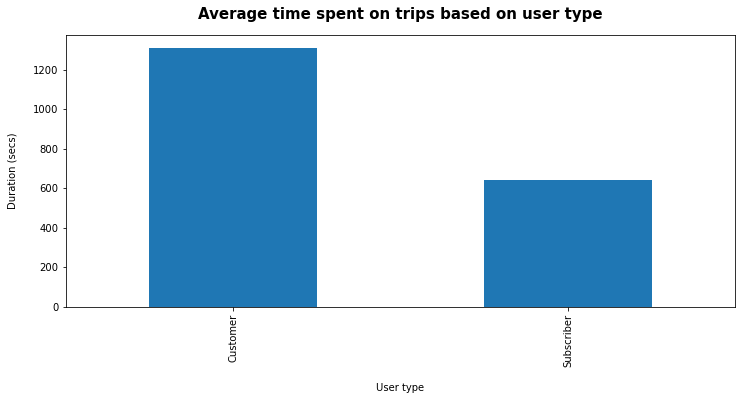

In [27]:
plt.figure(figsize = [12, 5])

df_clean.groupby('user_type')['duration_sec'].mean().plot(kind='bar')
put_labels('Average time spent on trips based on user type', 'User type', 'Duration (secs)')

The customer users have higher average time spent on trips than the subscribers.

Which user group covered the highest average distance?

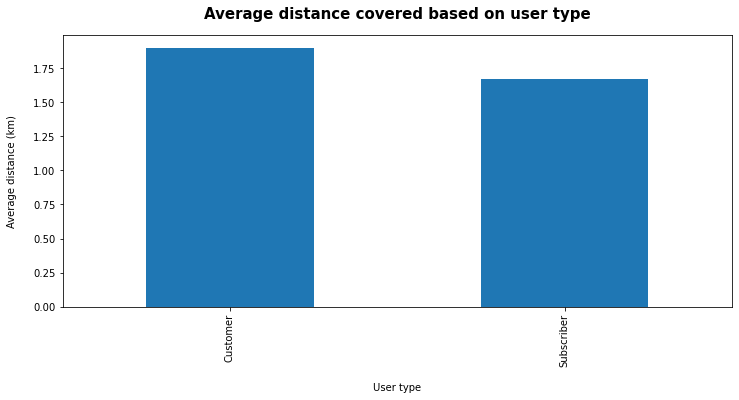

In [28]:
plt.figure(figsize = [12, 5])

df_clean.groupby('user_type')['distance(km)'].mean().plot(kind='bar')
put_labels('Average distance covered based on user type', 'User type', 'Average distance (km)')

The customer users covered more distance on the average than the subscriber users

Which gender shared bike most?

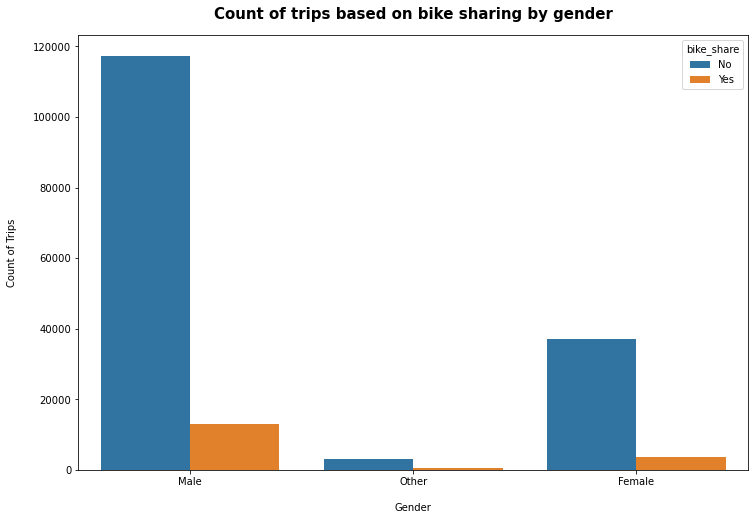

In [29]:
# plot count of trips based on bike sharing by gender.
plt.figure(figsize = [12, 8])
sb.countplot(data = df_clean, x = 'member_gender', hue = 'bike_share') 
put_labels('Count of trips based on bike sharing by gender', 'Gender', 'Count of Trips')

The male gender shared more bikes, but the is also relative to the number of users who are males

Do both customers and subscibers share bike?

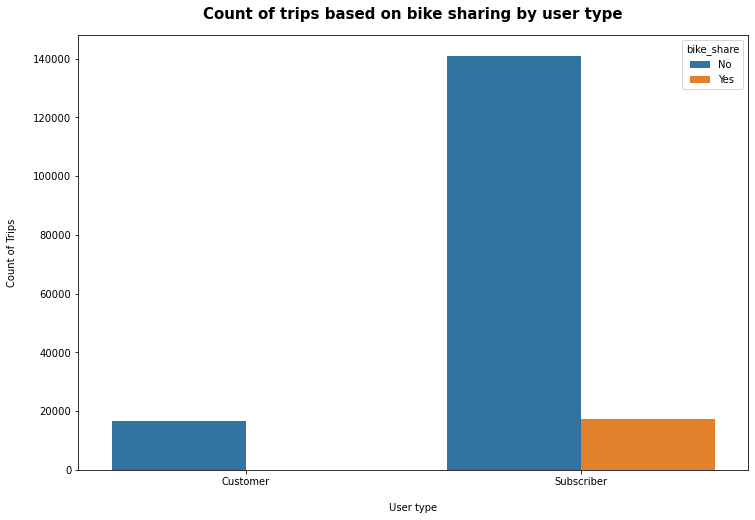

In [30]:
# Checking what user type had the higher number of bike sharing 
plt.figure(figsize = [12, 8])
sb.countplot(data = df_clean, x = 'user_type', hue='bike_share')
put_labels('Count of trips based on bike sharing by user type', 'User type', 'Count of Trips')

From the chart, it seems the customer users do not have the bike sharing option. To be able to share bike, a user should be a subscriber.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The customer users have higher average time spent on trips and cover more distance on the average than the subscribers.

> The male gender shared more bikes, but the is also relative to the number of users who are males

> It seems the customer users do not have the bike sharing option. To be able to share bike, a user should be a subscriber.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No Observation outside features of interest.

## Multivariate Exploration


which gender in user type has the highest duration?

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x432 with 0 Axes>

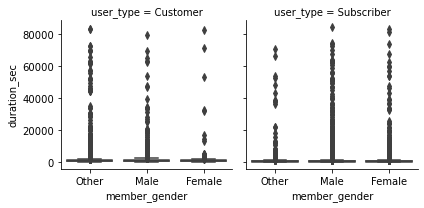

In [31]:
plt.figure(figsize=(10,6))
g = sb.FacetGrid(data = df_clean, col = 'user_type');
g.map(sb.boxplot, 'member_gender', 'duration_sec');

The other gender have slghtly highest duration in the customer category while the male gender have the highest duration in the susbsriber category

Which gender has the highest duration count during the week?

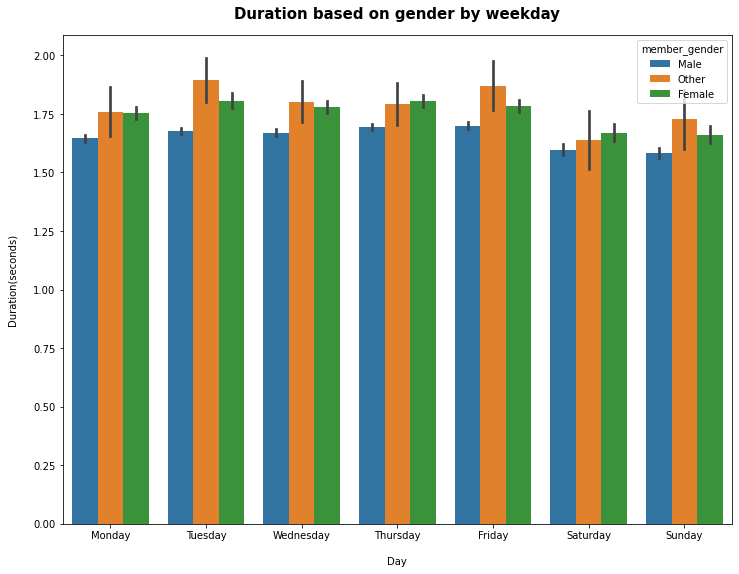

In [38]:
# creating a plot of distance based on day by gender

plt.figure(figsize=(12,9))
sb.barplot(data=df_clean, x='start_day', y='distance(km)'
           , order=order, hue='member_gender');
put_labels('Distance based on day by gender', 'Day', 'Distance(km)')

From the chart the other gender has highest duration count during the week?

Which user category has the higher duration count during the week?

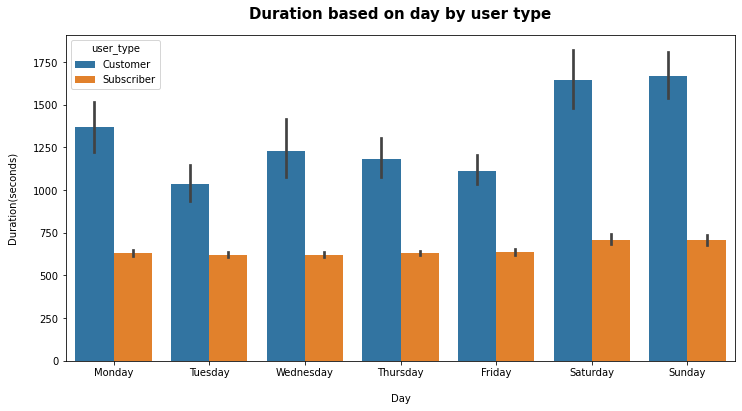

In [39]:
# creating a plot of duration based on day by user type

plt.figure(figsize=(12,6))
sb.barplot(data=df_clean, x='start_day', y='duration_sec'
           , order=order, hue='user_type');
put_labels('Duration based on day by user type', 'Day', 'Duration(seconds)')

From the chart, the customer user category has the higher duration count everyday of the week.

Which gender often share bikes?

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x432 with 0 Axes>

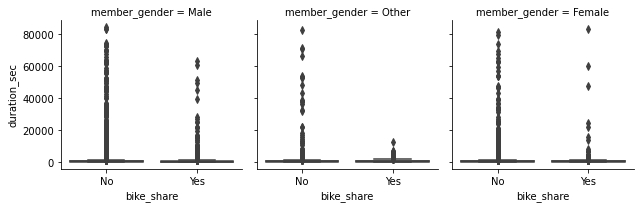

In [45]:
# duration based on bike sharing by gender

plt.figure(figsize=(10,6))
g = sb.FacetGrid(data = df_clean, col = 'member_gender')
g.map(sb.boxplot, 'bike_share', 'duration_sec');

observation from the plot shows that the male gender often share bike most.

Does shared bike cover more distance than bikes not shared?

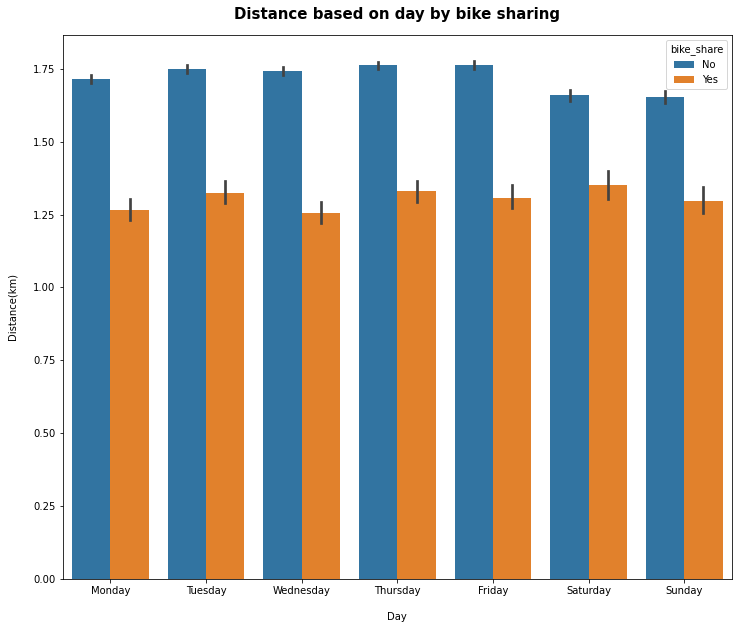

In [49]:
# distance based on day by bike sharing

plt.figure(figsize=(12,10))
sb.barplot(data=df_clean, x='start_day', y='distance(km)'
           , order=order, hue='bike_share');
put_labels('Distance based on day by bike sharing', 'Day', 'Distance(km)')

From the plot, bikes shared have more distance covered than bikes not shared.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Observation shows the customers have higher trip duration
> Those with bike sharing option covered more distance.


### Were there any interesting or surprising interactions between features?

> No surprising interaction between the features

## Conclusions
> The male gender take more trips than other genders. They make up 74% of the total trips

> The subscriber user have the bike sharing option.

> Only 9.9% of the trips are bike sharing

> 90.1% of the trips are by subscribers

> Most riders are between the ages of 20 to 60. But there are more riders between ages 20 and 40.


## References

> https://github.com/MaryamOsamaX/Ford-GoBike-System-Data-Visualization

> https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude